In [1]:
# Reference: https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/07_linear_models/01_linear_regression_intro.ipynb

In [2]:
# ! pip install matplotlib
# ! pip install statsmodels

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression

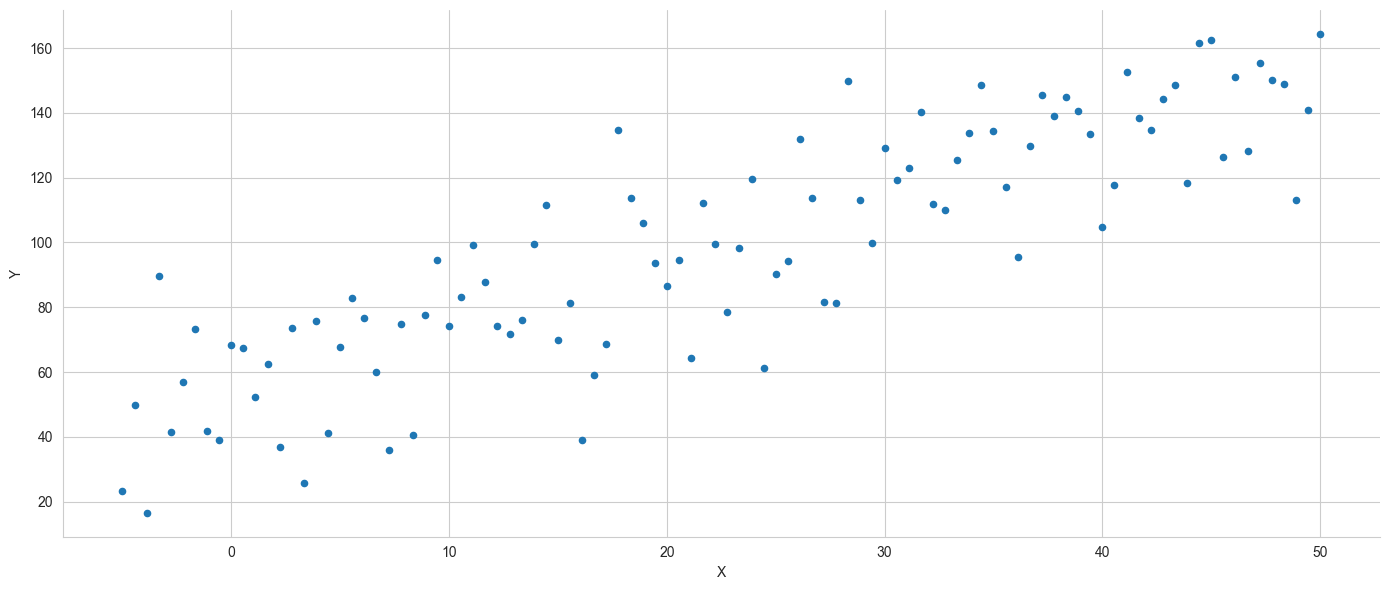

In [4]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

$y = \beta_{0} + \beta_{1} X_{1} + \epsilon$

In [5]:
# OLS: Ordinary Least Squares
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     281.8
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.39e-30
Time:                        16:28:00   Log-Likelihood:                -435.02
No. Observations:                 100   AIC:                             874.0
Df Residuals:                      98   BIC:                             879.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.8536      3.263     16.503      0.0

R-squared (coefficient of determination)  
0.8: The fitting is very good  
0.5~0.8: Medium  
< 0.5: Poor fitting  
  
Adj-R ² is almost equal to R ² → no overfitting  
  
Prob (F-statistic) < 0.05, good

A p-value less than 0.05 indicates statistical significance  

In [6]:
# β̂ = (XᵀX)⁻¹Xᵀy
# Calculate by hand using the OLS formula
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   53.85
X        1.98
dtype: float64

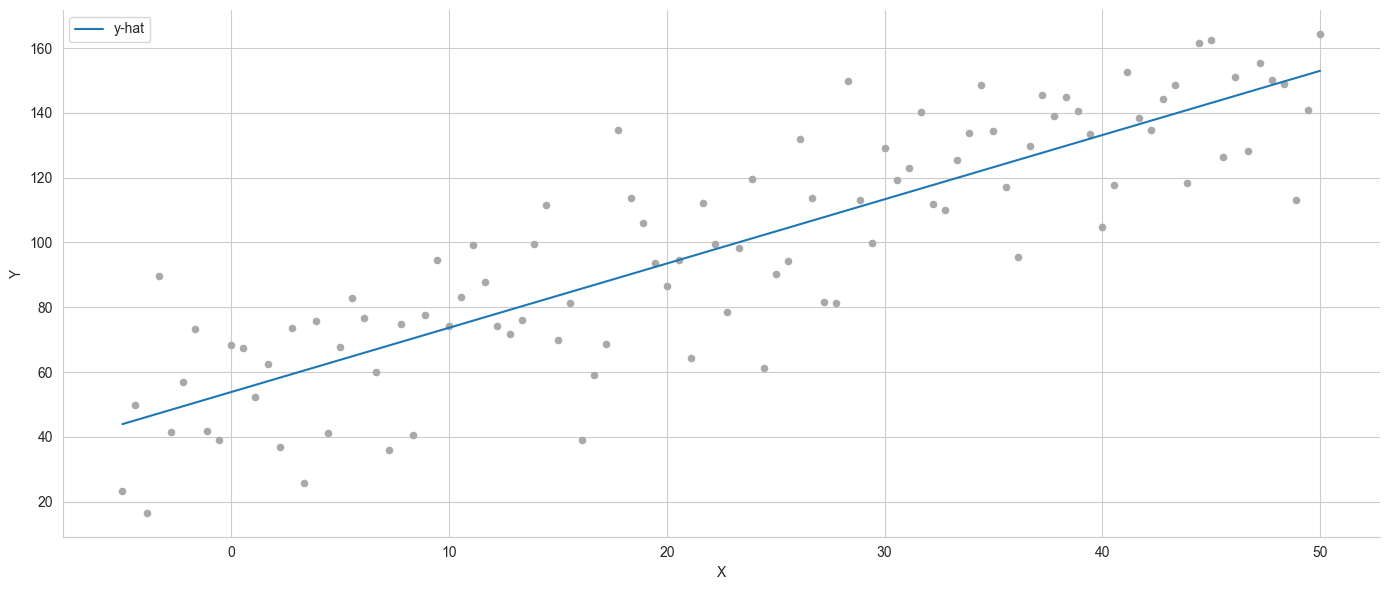

In [7]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
# for _, row in data.iterrows():
#     plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout()